In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import copy

In [3]:
from datetime import datetime

In [4]:
from bs4 import BeautifulSoup

In [5]:
from PIL import Image

In [6]:
import numpy as np
import pandas as pd

In [7]:
from dst_incidence.amazon_prices import PriceHistoryCollector

In [8]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = "/usr/local/Cellar/tesseract/5.2.0/bin/tesseract"

In [9]:
import re

In [10]:
import matplotlib.pyplot as plt

In [155]:
collector = PriceHistoryCollector(
    data_raw_dir="/Users/Paul-Emmanuel/Desktop/PhD/3_DST_incidence/data_raw",
    sku_reference='B002OHKHOQ', 
    country='Germany'
)

In [156]:
collector.fetch_product_information()

In [157]:
collector.price_history_summary

,Type de prix,Le plus bas jamais atteint *,Le plus élevé de tous les temps *,Actuel +,Moyenne *
0,Amazon,"1,69€ (05 mar. 2019)","3,21€ (24 août 2022)","2,99€ (21 sept. 2022)","2,78€"
1,Nouveauté 3ème partie,"1,60€ (30 jan. 2018)","6,97€ (28 fév. 2023)",-,"6,33€"
2,3eme occasion,"1,57€ (05 mar. 2019)","2,64€ (21 fév. 2019)",-,"1,90€"


In [158]:
collector.full_product_name

'wolfcraft Standard-Abbrechklingen-Messer 18 mm I 4146000 I Kunststoffmesser mit Metallführung | traq.html'

In [159]:
collector.build_price_history_from_charts()

In [160]:
collector.price_histories['amazon']

,x_axis_coord,trusted,price
0,88.0,True,2.790121
1,89.0,True,2.790121
2,90.0,True,2.790121
3,91.0,True,2.790121
4,92.0,True,2.790121
...,...,...,...
3003,3117.0,True,2.989976
3004,3118.0,True,2.989976
3005,3119.0,True,2.989976
3006,3120.0,True,2.989976


In [161]:
collector.get_start_end_dates_from_charts()

In [162]:
collector.start_end_dates

{'amazon': {'first_date': datetime.datetime(2016, 9, 1, 0, 0),
  'last_date': datetime.datetime(2024, 1, 1, 0, 0)},
 'new': {'first_date': datetime.datetime(2016, 9, 1, 0, 0),
  'last_date': datetime.datetime(2017, 9, 1, 0, 0)}}

In [163]:
collector.convert_coordinates_to_timestamps()

'Manually' correcting the final date for seller == new


In [164]:
collector.format_price_histories()

In [165]:
collector.price_histories['amazon']

,trusted,price,date,sku,country,unit,seller
0,True,2.790121,2016-09-01 00:00:00.000000000,B002OHKHOQ,Germany,€,amazon
1,True,2.790121,2016-09-01 21:11:27.240356400,B002OHKHOQ,Germany,€,amazon
2,True,2.790121,2016-09-02 18:22:54.480712800,B002OHKHOQ,Germany,€,amazon
3,True,2.790121,2016-09-03 15:34:21.721069200,B002OHKHOQ,Germany,€,amazon
4,True,2.790121,2016-09-04 12:45:48.961425600,B002OHKHOQ,Germany,€,amazon
...,...,...,...,...,...,...,...
3003,True,2.989976,2023-12-28 11:14:11.038574400,B002OHKHOQ,Germany,€,amazon
3004,True,2.989976,2023-12-29 08:25:38.278930800,B002OHKHOQ,Germany,€,amazon
3005,True,2.989976,2023-12-30 05:37:05.519287200,B002OHKHOQ,Germany,€,amazon
3006,True,2.989976,2023-12-31 02:48:32.759643600,B002OHKHOQ,Germany,€,amazon


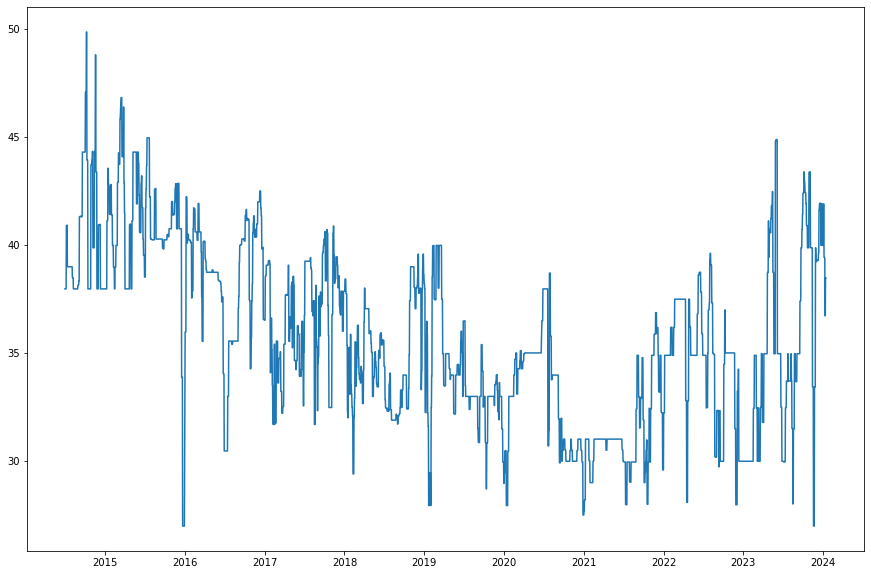

In [37]:
plt.figure(figsize=(15, 10))
plt.plot(collector.price_histories['amazon']['date'], collector.price_histories['amazon']['price'])
# plt.plot(collector.price_histories['amazon']['date'], collector.price_histories['amazon']['trusted'])
plt.show();

In [55]:
path_to_price_history_csv = os.path.join(
    os.path.dirname(os.path.dirname(os.path.abspath("__file__"))),
    "dst_incidence", "data", "prices", "price_history.csv"
)

In [61]:
price_history_csv['sku'].nunique()

45

In [62]:
price_history_csv.head()

,trusted,price,date,sku,country,unit,seller
0,True,80.938098,2012-10-01 00:00:00.000000000,B0000C73CQ,France,€,amazon
1,True,80.938098,2012-10-02 07:48:22.223696400,B0000C73CQ,France,€,amazon
2,True,80.880810,2012-10-03 15:36:44.447396400,B0000C73CQ,France,€,amazon
3,True,80.880810,2012-10-04 23:25:06.671092800,B0000C73CQ,France,€,amazon
4,True,34.821621,2012-10-06 07:13:28.894789200,B0000C73CQ,France,€,amazon


In [67]:
pd.to_datetime(price_history_csv['date'])

0        2012-10-01 00:00:00.000000000
1        2012-10-02 07:48:22.223696400
2        2012-10-03 15:36:44.447396400
3        2012-10-04 23:25:06.671092800
4        2012-10-06 07:13:28.894789200
                      ...             
450835   2023-12-27 15:06:16.619065200
450836   2023-12-30 08:39:51.232147200
450837   2023-12-30 21:46:34.154767200
450838   2023-12-31 10:53:17.077383600
450839   2024-01-01 00:00:00.000000000
Name: date, Length: 450840, dtype: datetime64[ns]

In [71]:
price_history_csv[price_history_csv['trusted'] == '1.0']

,trusted,price,date,sku,country,unit,seller
125060,1.0,29.898911,2017-11-01 00:00:00,B019H693FA,France,€,new
125061,1.0,29.898911,2017-11-01 17:51:35.027989200,B019H693FA,France,€,new
125062,1.0,29.898911,2017-11-02 11:43:10.055974800,B019H693FA,France,€,new
125063,1.0,29.898911,2017-11-03 05:34:45.083964,B019H693FA,France,€,new
125064,1.0,28.936507,2017-11-03 23:26:20.111953200,B019H693FA,France,€,new
...,...,...,...,...,...,...,...
192243,1.0,13.969152,2023-08-28 11:45:32.301612,B073YQ5KSX,France,€,new
192244,1.0,13.969152,2023-08-29 02:40:15.805070400,B073YQ5KSX,France,€,new
192245,1.0,13.969152,2023-08-29 17:34:59.308528800,B073YQ5KSX,France,€,new
192246,1.0,13.969152,2023-08-30 08:29:42.811987200,B073YQ5KSX,France,€,new


In [68]:
price_history_csv = pd.read_csv(
    path_to_price_history_csv,
    dtype={"trusted": bool, "price": float, "date": str, "sku": str, "country": str, "seller": str},
    parse_dates=['date']
)
price_history_csv[
    np.logical_and(
        price_history_csv['country'] == collector.country,
        np.logical_and(
            price_history_csv['sku'] == collector.sku_reference,
            price_history_csv['seller'] == "amazon"
        )
    )
]

ValueError: cannot safely convert passed user dtype of bool for object dtyped data in column 0

In [64]:
price_history_csv.dtypes

trusted     object
price      float64
date        object
sku         object
country     object
unit        object
seller      object
dtype: object

In [14]:
collector.fetch_product_information()

collector.build_price_history_from_charts()
collector.get_start_end_dates_from_charts()
collector.get_end_date_from_price_history_summary()
collector.convert_coordinates_to_timestamps()

collector.format_price_histories()
collector.format_price_history_summary()
collector.format_product_data()
collector.build_collection_metadata()

/Users/Paul-Emmanuel/.pyenv/versions/3.7.7/envs/lewagon-data/lib/python3.7/site-packages/dst_incidence/amazon_prices.py:226: RuntimeWarning: Mean of empty slice.
  avg_y_coord = img_array.shape[0] - y_coords.mean()
/Users/Paul-Emmanuel/.pyenv/versions/3.7.7/envs/lewagon-data/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [15]:
collector.price_history_summary # ['first_date']

,sku,country,unit,seller,min_price,min_price_date,max_price,max_price_date,current_price,current_price_date,average_price
0,B0000C73CQ,France,€,amazon,10.99,2019-03-29,126.94,2012-09-27,16.90,2023-09-07,16.22
1,B0000C73CQ,France,€,new,1.99,2013-05-31,29.07,2023-06-07,NaN,NaT,16.54
2,B0000C73CQ,France,€,used,8.90,2019-10-09,68.03,2017-05-08,16.56,2024-01-16,16.63


In [16]:
collector.price_histories

{'amazon':           price                          date         sku country unit  seller
 0           NaN 2013-10-01 00:00:00.000000000  B0000C73CQ  France    €  amazon
 1           NaN 2013-10-02 05:57:46.207846800  B0000C73CQ  France    €  amazon
 2     80.938098 2013-10-03 11:55:32.415690000  B0000C73CQ  France    €  amazon
 3     80.938098 2013-10-04 17:53:18.623536800  B0000C73CQ  France    €  amazon
 4     80.880810 2013-10-05 23:51:04.831383600  B0000C73CQ  France    €  amazon
 ...         ...                           ...         ...     ...  ...     ...
 2901  16.947905 2024-01-16 02:05:51.823813200  B0000C73CQ  France    €  amazon
 2902  16.947905 2024-01-17 08:03:38.031660000  B0000C73CQ  France    €  amazon
 2903  16.947905 2024-01-18 14:01:24.239503200  B0000C73CQ  France    €  amazon
 2904  16.947905 2024-01-19 19:59:10.447350000  B0000C73CQ  France    €  amazon
 2905  16.947905 2024-01-21 01:56:56.655196800  B0000C73CQ  France    €  amazon
 
 [2906 rows x 6 columns]}

In [17]:
collector.sellers

{'amazon': {}}